### 1. Summary for our data :
We have 3044 data of all the startup that runs in india with the column of startup date, startup name, industry vertical with industry subvertical, city, investors name, investment type, amount and remarks.

### 2. Write Column Descriptions :
- `Sr No` = Serial number of data.
- `Date dd/mm/yyyy` : The date of startup.
- `Startup Name` : The name of the startup.
- `Industry Vertical` : The industry of the startup like e-commerce, technology or etc.
- `SubVertical` : Sub vertical of our industry vertical like E-learning is the sub vertical of E-tech industry.
- `City Location` : Name of the city where startup was started.
- `Investors Name` : The name of the all the investors who invested in the startup.
- `InvestmentType` : Type of investement in the company like seed funding or private funding etc.. 
- `Amount in USD` : The total amount invested by the investors.
- `Remarks` : Just for comment purpose. Like round of seed funding.

### 3. Add any addition information :
#### Additional useful information : 
- None

### 4. Type of Assessment :
There are 2 types of assessement styles
- Manual - Looking through the data manually in google sheets
- Programmatic - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment :
There are 2 steps involved in Assessment
- Discover
- Document

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# pd.set_option("display.max_rows",100)

In [3]:
df = pd.read_csv("startup_funding.csv")

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Amount in USD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentType          4
Amount in USD         960
Remarks              2625
dtype: int64

In [6]:
df.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentType       object
Amount in USD        object
Remarks              object
dtype: object

### Issues with the dataset :

1. Dirty Data(Quality data): 

    - Date dd/mm/yyyy = Data type is Object It needs to be changed in datetime format. `validity`
    - Date = Some date contain only two or more than three "/" in the data and some contain ".". `validity`
    - Date = index number [192, 2571] missing "/", 2606 contains unicode. `validity` 
    - Startup Name, Industry Vertical, SubVertical, Investors Name contains unicode characters. `accuracy`
    - Startup Name = .in, .com, .io must be removed. `accuracy`
    - Industry Vertical = 171 Missing Values. `completeness`
    - SubVertical = 936 Missing Values. `completeness`
    - City Location = 180 Missing Values. `completeness`
    - Investors Name = 24 Missing Values. `completeness`
    - InvestmentType = data is not consistent like seed funding named as seed round, seed funding round. `consistency`
    - Amount in USD = change it to indian rupees. `validity`
    - Remarks = 2625 Missing Values need to dropped. `completeness`
    - City = Change Bengaluru to Bangalore. `consistency`
    - Industry Vertical = chnage this names ecommerce,eCommerce,ECommerce,E-commerce to same format. `consistency`
    


<!-- 2. Messy Data(Tidy Data) : -->

### Automatic Assessment :
- head and tail
- sample
- info
- isnull
- duplicated
- describe

In [7]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Amount in USD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentType     3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [10]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentType          4
Amount in USD         960
Remarks              2625
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


### Data Quality Dimensions :
- Completeness - Is data missing?
- Validity - Is data invalid => negative height => duplicate patient id.
- Accuracy - data is valid but not accurate => weight => 1kg instead of pounds.
- Consistency - both valid and accurate but written differently => New York => NY.

### Order of severity :
- completeness < validity < accuracy < consistency

### Data Cleaning Order :
1. Quality : Completeness
2. Tidiness
3. Quality : Validity
4. Quality : Accuracy
5. Quality : Consistency

### Steps involved in Data Cleaning :
- Define
- Code
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process.`

In [13]:
df_copy = df.copy()

In [14]:
df_copy.drop("Sr No",axis=1,inplace=True)
df_copy.drop("Remarks",axis=1,inplace=True)

In [15]:
df_copy.columns = ['date', 'startup_name', 'industry_vertical', 'sub_vertical',
       'city', 'investors_name', 'investment_type', 'amount(USD)']

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               3044 non-null   object
 1   startup_name       3044 non-null   object
 2   industry_vertical  2873 non-null   object
 3   sub_vertical       2108 non-null   object
 4   city               2864 non-null   object
 5   investors_name     3020 non-null   object
 6   investment_type    3040 non-null   object
 7   amount(USD)        2084 non-null   object
dtypes: object(8)
memory usage: 190.4+ KB


### 1. Quality - Completeness

#### Working on completeness in all column.

In [17]:
df_copy.isna().sum()

date                   0
startup_name           0
industry_vertical    171
sub_vertical         936
city                 180
investors_name        24
investment_type        4
amount(USD)          960
dtype: int64

In [18]:
# Define : Replace all the values with "no data".
df_copy[df_copy["industry_vertical"].isnull()]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD)
2873,2/3/2015,TrulyMadly.com,NaN,NaN,NaN,"Helion Venture Partners, Kae Capital",Private Equity,"55,00,000"
2874,2/3/2015,InstaLively,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"1,20,000"
2875,3/3/2015,Vserv,NaN,NaN,NaN,"Maverick Capital, IDG Ventures India",Private Equity,"1,50,00,000"
2876,3/3/2015,Intruo.com,NaN,NaN,NaN,"Ashutosh Lawania, Alok Goel & others",Seed Funding,NaN
2877,5/3/2015,Niffler,NaN,NaN,NaN,SAIF Partners,Seed Funding,"10,00,000"
...,...,...,...,...,...,...,...,...
3039,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [19]:
# Code
df_copy.fillna("no data",inplace=True)

In [20]:
# Test
df_copy.isnull().sum()

date                 0
startup_name         0
industry_vertical    0
sub_vertical         0
city                 0
investors_name       0
investment_type      0
amount(USD)          0
dtype: int64

### 2. Quality - Validity

#### Working on Validity in date column.

In [21]:
# df_copy

In [22]:
# pd.to_datetime(df_copy["date"])
# We got the value error by running this code. We need to find the error by finding the date of 05/07/2018.
# So we are writing one code to get if there are any date which contain less than 3 and more then 3 "/" in date column.

In [23]:
# Define : Convert data type of date into datetime.
df_copy[df_copy["date"].apply(lambda x : True if x.count("/") <= 1 or x.count("/") > 2 else False)]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD)
192,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,"62,50,000"
2775,12/05.2015,Mobiefit,Mobile Fitness App,no data,Goa,Prototyze,Seed Funding,no data
2776,12/05.2015,Plancess,Online Education Platform,no data,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,"20,00,000"
2831,13/04.2015,The Porter,Logistics Tech,no data,Mumbai,Kae Capital,Seed Funding,"5,00,000"
3011,15/01.2015,Wishberry,no data,no data,no data,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000"
3029,22/01//2015,Corporate360,no data,no data,no data,Group of Angel Investors,Seed Funding,"2,00,000"


In [24]:
# Code
df_copy["date"] = df_copy["date"].str.replace(".","/").str.replace("//","/")

In [25]:
df_copy["date"].iloc[192]

'05/072018'

In [26]:
df_copy["date"].iloc[2571]

'01/07/015'

In [27]:
df_copy["date"][2606]

'\\\\xc2\\\\xa010/7/2015'

In [28]:
df_copy["date"].iloc[192]  = "05/07/2018"
df_copy["date"].iloc[2571] = "01/07/2015"
df_copy["date"].iloc[2606] = "10/07/2015"

In [29]:
df_copy["date"] = pd.to_datetime(df_copy["date"])

In [30]:
# Test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3044 non-null   datetime64[ns]
 1   startup_name       3044 non-null   object        
 2   industry_vertical  3044 non-null   object        
 3   sub_vertical       3044 non-null   object        
 4   city               3044 non-null   object        
 5   investors_name     3044 non-null   object        
 6   investment_type    3044 non-null   object        
 7   amount(USD)        3044 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 190.4+ KB


#### Working on validity in amount USD column.

In [31]:
# Define : Converting amount into indian rupees.
df_copy["amount(USD)"]

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042         no data
3043        1,40,000
Name: amount(USD), Length: 3044, dtype: object

In [32]:
# Code
df_copy["amount(USD)"] = df_copy["amount(USD)"].str.replace(",","")
df_copy["amount(USD)"] = pd.to_numeric(df_copy["amount(USD)"],errors="coerce")

In [33]:
# df_copy["amount(USD)"] = df_copy["amount(USD)"].fillna(df_copy["amount(USD)"].mean())

In [34]:
df_copy["amount(USD)"] = (df_copy["amount(USD)"] * 83.25) / 10000000

In [35]:
df_copy.rename(columns={"amount(USD)":"amount_cr"},inplace= True)

In [36]:
# Test
df_copy["amount_cr"]

0       1665.000000
1         67.002880
2        152.837510
3         24.975000
4         14.985000
           ...     
3039      37.462500
3040       6.868125
3041      12.487500
3042            NaN
3043       1.165500
Name: amount_cr, Length: 3044, dtype: float64

In [37]:
df_copy

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_cr
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1665.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.002880
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.837510
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.975000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.985000
...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,no data,no data,no data,Asia Pacific Internet Group,Private Equity,37.462500
3040,2015-01-29,Graphene,no data,no data,no data,KARSEMVEN Fund,Private Equity,6.868125
3041,2015-01-30,Mad Street Den,no data,no data,no data,"Exfinity Fund, GrowX Ventures.",Private Equity,12.487500
3042,2015-01-30,Simplotel,no data,no data,no data,MakeMyTrip,Private Equity,NaN


In [38]:
def clean_my_column(column_name):
    special_char = ["\\\\xe2\\\\x80\\\\x99s","\\\\xe2\\\\x80\\\\x99","\\\\xc2\\\\xa0","\\\\xc3\\\\x98","\\xe2\\x80\\x93","\\\\n","\\\\xc3\\\\xa","\\xe2\\x80\\x99s"]
    special_char2 = "\\\\xc3\\\\xa9"
    
    for char in special_char:
        # df_copy[column_name] = df_copy[column_name].replace(char,"")
        df_copy[column_name] = df_copy[column_name].apply(lambda x : str(x).replace(char,""))
    
    df_copy[column_name] = df_copy[column_name].apply(lambda x : str(x).replace(special_char2,""))
    
    # df_copy[column_name] = df_copy[column_name].replace(special_char2,"e")
    df_copy[column_name] = df_copy[column_name].str.strip()
    df_copy[column_name] = df_copy[column_name].replace("nan",np.nan)

### 3. Quality - Accuracy

#### Working on accuracy in startup_name

In [39]:
# Define : Remove all .io,.com,.in and change wealthbucket, byju's name from the dataset.

first = ["https://www.wealthbucket.in/",'"BYJU\\\\\'S"',".com",".io",".in"]
second = ["wealthbucket","BYJU'S","","",""]

In [40]:
# Code
for i in range(len(first)):
    df_copy["startup_name"] = df_copy["startup_name"].apply(lambda x : x.replace(first[i],second[i]))

In [41]:
# Test
df_copy.iloc[3][1]

'wealthbucket'

In [42]:
# Define : Remove all the unicode character from startup name.
df_copy.iloc[2495][1]

'Carl\\\\xe2\\\\x80\\\\x99s Jr'

In [43]:
# Code
clean_my_column("startup_name")

In [44]:
# Test
df_copy.iloc[2495][1]

'Carl Jr'

In [45]:
# df_copy.loc[2504][1]

In [46]:
# df_copy.iloc[67][1]

In [47]:
# df_copy.iloc[2013][1]

In [48]:
# df_copy.loc[2720][1]

In [49]:
# df_copy.loc[2954][1]

In [50]:
# df_copy.loc[1394][1]

In [51]:
# df_copy.loc[2606]

#### Working on accuracy and consistency in City column

In [52]:
# Define : Replace Bengaluru with Bangalore.
df_copy.head()

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_cr
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1665.00000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.00288
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,152.83751
3,2020-02-01,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.97500
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.98500


In [53]:
# Code
df_copy["city"] = df_copy["city"].str.replace("Bengaluru","Bangalore")

In [54]:
# Test
df_copy.head()

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_cr
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,1665.00000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.00288
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,152.83751
3,2020-02-01,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.97500
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.98500


In [55]:
# Define : Remove all the unicode character from city column.
# Code
clean_my_column("city")

In [56]:
# Test
[i for i in df_copy["city"] if "\\" in i]

[]

In [57]:
# df_copy[df_copy["startup_name"] == "CarDekho"]

In [58]:
# df_copy[df_copy.duplicated(subset=["startup_name"])]

In [59]:
# df_copy.isna().sum()

#### Working on accuracy and consistency in Industry Vertical column

In [60]:
# Define : Change the different ecommerce variant with same name.
# Code
df_copy["industry_vertical"] = df_copy["industry_vertical"].apply(lambda x : str(x).replace("ecommerce","E-commerce").replace("eCommerce","E-commerce").replace("ECommerce","E-Commerce").replace("E-commerce","E-Commerce"))

In [61]:
# Test
df_copy[df_copy["industry_vertical"] == "ecommerce"]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_cr


In [62]:
# Define : Remove all the unicode character from industry vertical column.
# Code
clean_my_column("industry_vertical")

In [63]:
# Test
[i for i in df_copy["industry_vertical"] if "\\" in i]

[]

#### Working on accuracy in Sub Vertical column

In [64]:
# Define : Remove \\\\ in sub_vertical column at 438 index.
df_copy.iloc[[438]]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_cr
438,2017-07-12,eShakti,Ecommerce,"""Women\\'s Fashion Clothing Online Platform""",Chennai,IDG Ventures,Debt Funding,19.1475


In [65]:
# Code
df_copy.loc[438,"sub_vertical"] = "Women's Fashion Clothing Online Platform"

In [66]:
# Test
df_copy.iloc[438]

date                                      2017-07-12 00:00:00
startup_name                                          eShakti
industry_vertical                                   Ecommerce
sub_vertical         Women's Fashion Clothing Online Platform
city                                                  Chennai
investors_name                                   IDG Ventures
investment_type                                  Debt Funding
amount_cr                                             19.1475
Name: 438, dtype: object

In [67]:
# Define : Remove all the unicode character from sub_vertical column.
# Code 
clean_my_column("sub_vertical")

In [68]:
# Test
[i for i in df_copy["sub_vertical"] if "\\" in i]

[]

#### Working on accuracy in Investor Name column

In [69]:
# df_copy["investors_name"].fillna("Unknown",inplace=True)

In [70]:
# Define : Change softbank name to softbank group in same format.
# Code
df_copy["investors_name"] = df_copy["investors_name"].apply(lambda x : x.replace("Softbank","Softbank Group").replace("SoftBank Group","Softbank Group").replace('"Kedaraa Capital, Ontario Teachers\\\\\'"',"Kedaraa Capital, Ontario Teachers"))

In [71]:
# Test
df_copy[df_copy["investors_name"] == "Softbank"]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_cr


In [72]:
# Define : Remove all the unicode character from investors_name.
# Code
clean_my_column("investors_name")

In [73]:
# Test
[i for i in df_copy["investors_name"] if "\\" in i]

[]

### 4. Quality : Consistency

#### Working on Consistency in investment_type.

In [74]:
df_copy["investment_type"].str.contains("Series")

0       False
1        True
2        True
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: investment_type, Length: 3044, dtype: bool

In [75]:
df_copy["investment_type"].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', 'no data', 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\

In [76]:
df_copy["investment_type"] = df_copy["investment_type"].str.upper()

In [77]:
df_copy["investment_type"].unique()

array(['PRIVATE EQUITY ROUND', 'SERIES C', 'SERIES B', 'PRE-SERIES A',
       'SEED ROUND', 'SERIES A', 'SERIES D', 'SEED', 'SERIES F',
       'SERIES E', 'DEBT FUNDING', 'SERIES G', 'SERIES H', 'VENTURE',
       'SEED FUNDING', 'NO DATA', 'FUNDING ROUND', 'CORPORATE ROUND',
       'MAIDEN ROUND', 'SEED FUNDING ROUND', 'SINGLE VENTURE',
       'VENTURE ROUND', 'ANGEL', 'SERIES J', 'ANGEL ROUND',
       'VENTURE - SERIES UNKNOWN', 'BRIDGE ROUND', 'PRIVATE EQUITY',
       'DEBT AND PREFERENCE CAPITAL', 'INHOUSE FUNDING',
       'SEED/ ANGEL FUNDING', 'DEBT', 'PRE SERIES A', 'EQUITY',
       'DEBT-FUNDING', 'MEZZANINE', 'SERIES B (EXTENSION)',
       'EQUITY BASED FUNDING', 'PRIVATE FUNDING', 'SEED / ANGEL FUNDING',
       'SEED/ANGEL FUNDING', 'SEED / ANGLE FUNDING',
       'ANGEL / SEED FUNDING', 'PRIVATE', 'STRUCTURED DEBT', 'TERM LOAN',
       'PRIVATEEQUITY', 'ANGEL FUNDING', 'SEED\\\\NFUNDING',
       'PRIVATE\\\\NEQUITY', 'CROWD FUNDING'], dtype=object)

In [78]:
# Define : Change the all different names with the similar name of investment type.
remove_lst1 = ["SEED","SEED ROUND", "SEED FUNDING ROUND", "SEED\\\\NFUNDING"] # SEED FUNDING
remove_lst2 = ["PRIVATE EQUITY ROUND", "PRIVATE", "PRIVATEEQUITY", "PRIVATE\\\\NEQUITY","PROVATE FUNDING"] # PRIVATE FUNDING
remove_lst3 = ["SEED/ ANGEL FUNDING", "SEED / ANGEL FUNDING", "SEED/ANGEL FUNDING","SEED / ANGLE FUNDING"] # SEED / ANGEL FUNDING
remove_lst4 = ["ANGEL","ANGEL ROUND"] # ANGEL FUNDING
remove_lst5 = ["EQUITY"] # EQUTIY FUNDING
remove_lst6 = ["VENTURE - SERIES UNKNOWN"] # VENTURE

In [79]:
# Code
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "SEED FUNDING" if x in remove_lst1 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "PRIVATE FUNDING" if x in remove_lst2 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "SEED / ANGEL FUNDING" if x in remove_lst3 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "ANGEL FUNDING" if x in remove_lst4 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "EQUITY FUNDING" if x in remove_lst5 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "VENTURE" if x in remove_lst6 else x)

In [80]:
# Test
df_copy["investment_type"].unique()

array(['PRIVATE FUNDING', 'SERIES C', 'SERIES B', 'PRE-SERIES A',
       'SEED FUNDING', 'SERIES A', 'SERIES D', 'SERIES F', 'SERIES E',
       'DEBT FUNDING', 'SERIES G', 'SERIES H', 'VENTURE', 'NO DATA',
       'FUNDING ROUND', 'CORPORATE ROUND', 'MAIDEN ROUND',
       'SINGLE VENTURE', 'VENTURE ROUND', 'ANGEL FUNDING', 'SERIES J',
       'BRIDGE ROUND', 'PRIVATE EQUITY', 'DEBT AND PREFERENCE CAPITAL',
       'INHOUSE FUNDING', 'SEED / ANGEL FUNDING', 'DEBT', 'PRE SERIES A',
       'EQUITY FUNDING', 'DEBT-FUNDING', 'MEZZANINE',
       'SERIES B (EXTENSION)', 'EQUITY BASED FUNDING',
       'ANGEL / SEED FUNDING', 'STRUCTURED DEBT', 'TERM LOAN',
       'CROWD FUNDING'], dtype=object)

In [81]:
df_copy["investment_type"] = df_copy["investment_type"].str.title()

In [82]:
df_copy["investment_type"].unique()

array(['Private Funding', 'Series C', 'Series B', 'Pre-Series A',
       'Seed Funding', 'Series A', 'Series D', 'Series F', 'Series E',
       'Debt Funding', 'Series G', 'Series H', 'Venture', 'No Data',
       'Funding Round', 'Corporate Round', 'Maiden Round',
       'Single Venture', 'Venture Round', 'Angel Funding', 'Series J',
       'Bridge Round', 'Private Equity', 'Debt And Preference Capital',
       'Inhouse Funding', 'Seed / Angel Funding', 'Debt', 'Pre Series A',
       'Equity Funding', 'Debt-Funding', 'Mezzanine',
       'Series B (Extension)', 'Equity Based Funding',
       'Angel / Seed Funding', 'Structured Debt', 'Term Loan',
       'Crowd Funding'], dtype=object)

In [83]:
# new_df

### Visualization Starts

In [85]:
sns.set(style="darkgrid")

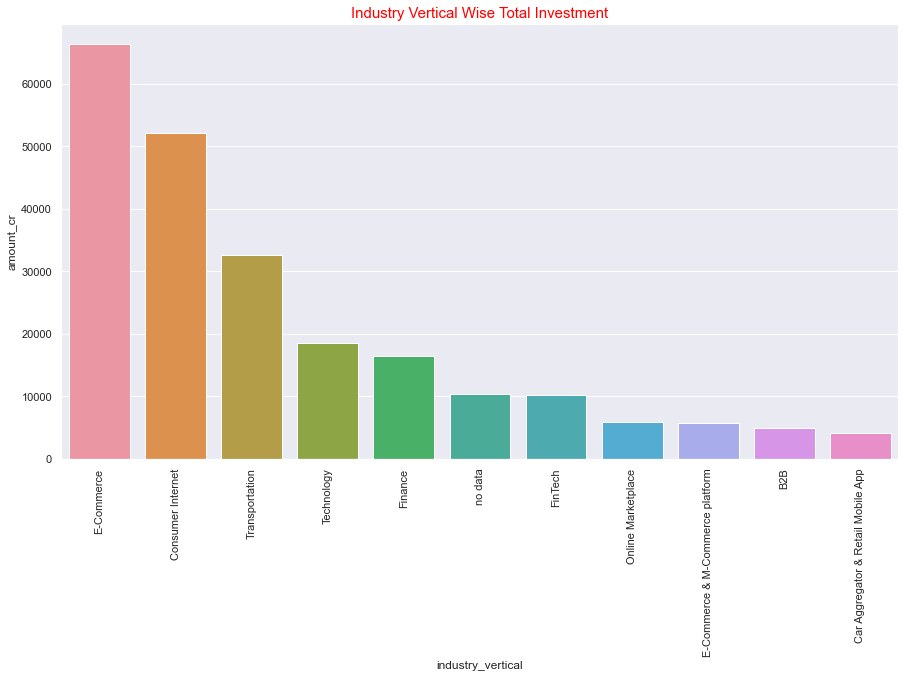

In [86]:
bar_df = df_copy.groupby("industry_vertical")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="industry_vertical",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Industry Vertical Wise Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Consumer Internet has the highest investment of more than 1 lac Cr and on second E-Commerce sector has 80k Cr and on third technology sector has total investment of 42k Cr.

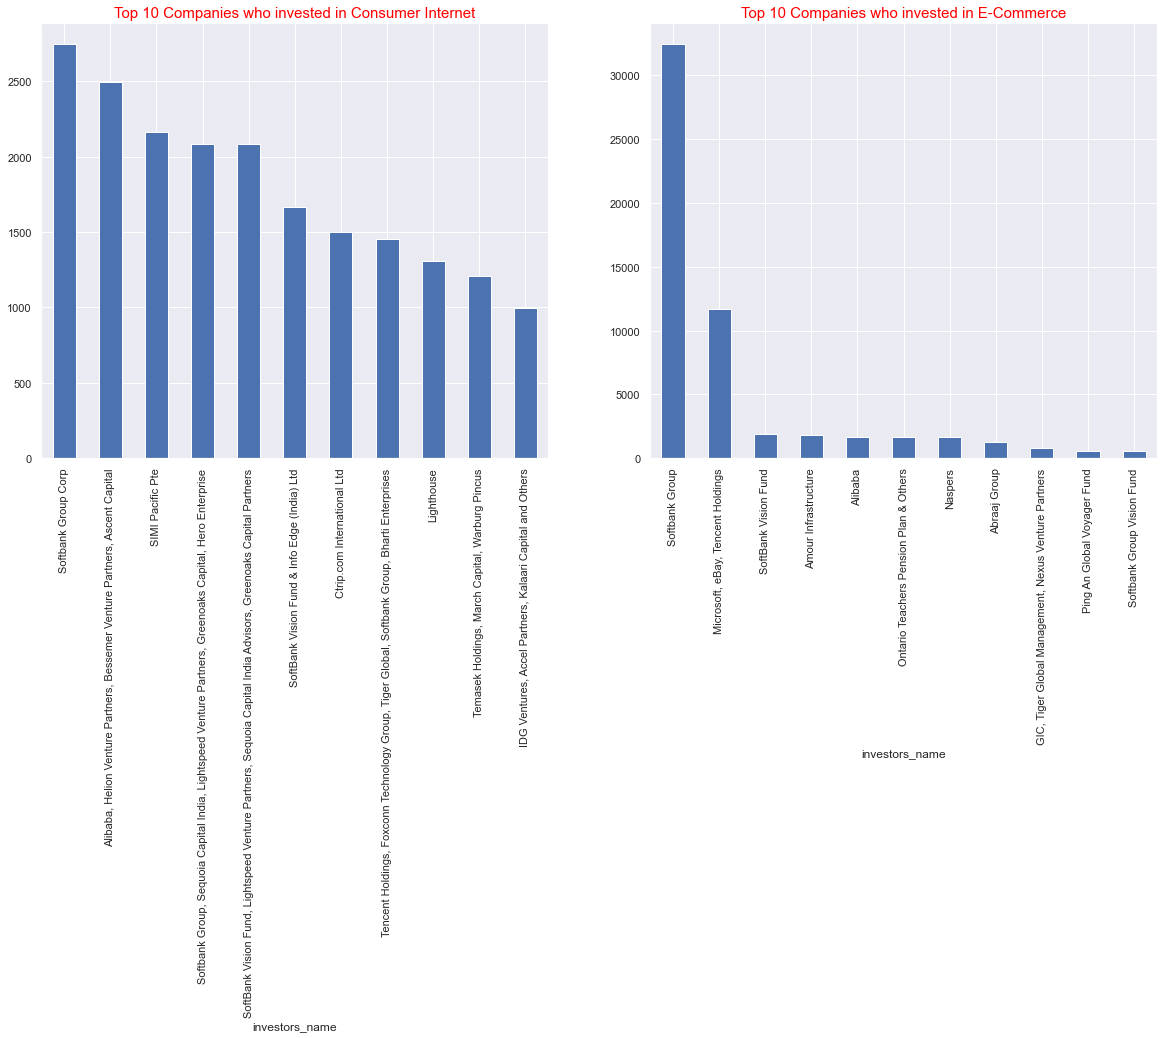

In [87]:
# Which investors have invested howmuch money in the consumer internet :
fig,axes = plt.subplots(1,2,figsize=(20,8))
industry_lst = ["Consumer Internet","E-Commerce"]

for i in range(len(industry_lst)):
    grp1 = df_copy[df_copy["industry_vertical"] == industry_lst[i]].groupby("investors_name")["amount_cr"].sum().sort_values(ascending=False)[:11]
    grp1.plot(kind="bar",ax=axes[i])
    axes[i].set_title(f"Top 10 Companies who invested in {industry_lst[i]}",fontdict={"fontsize":15,"color":"red"})
    plt.tight_layout()

# Summary :
# Softbank Group is the company who invested in the both Consumer Internet with more than 2500 Cr and E-Commerce industry with more than 30000 Cr investment.

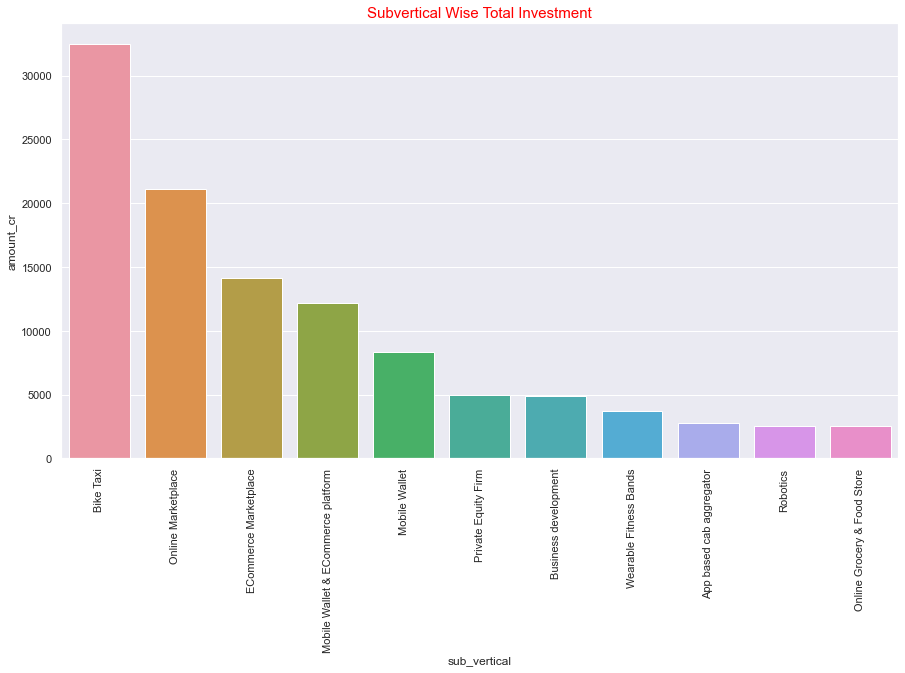

In [172]:
bar_df = df_copy[df_copy["sub_vertical"] != "no data"].groupby(["industry_vertical","sub_vertical"])["amount_cr"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="sub_vertical",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Subvertical Wise Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Bike Taxi is on the top with 30000 Cr investment.

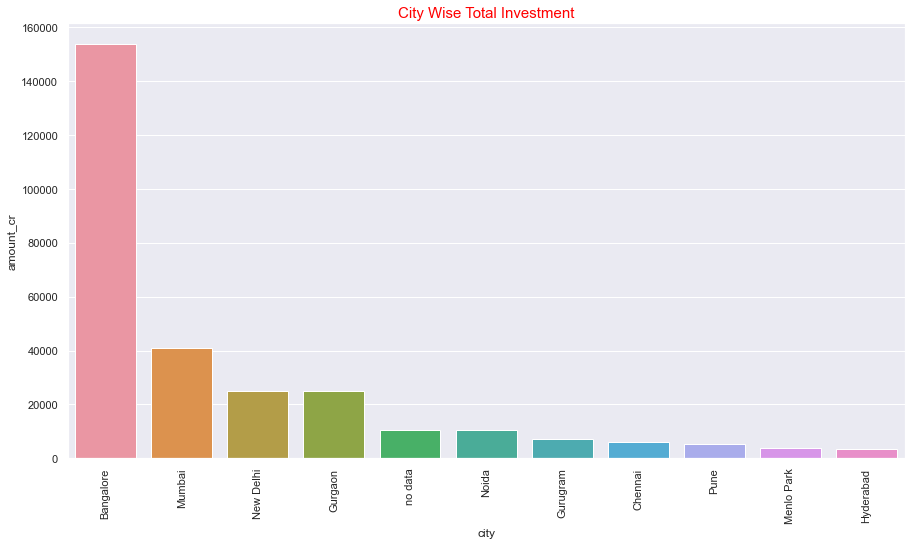

In [90]:
# Define : City wise total investent in startup
# Code
bar_df = df_copy.groupby("city")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="city",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("City Wise Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Bangalore city startup has the investment of more than 15000 Cr and mumbai comes on second place with 40000 Cr.

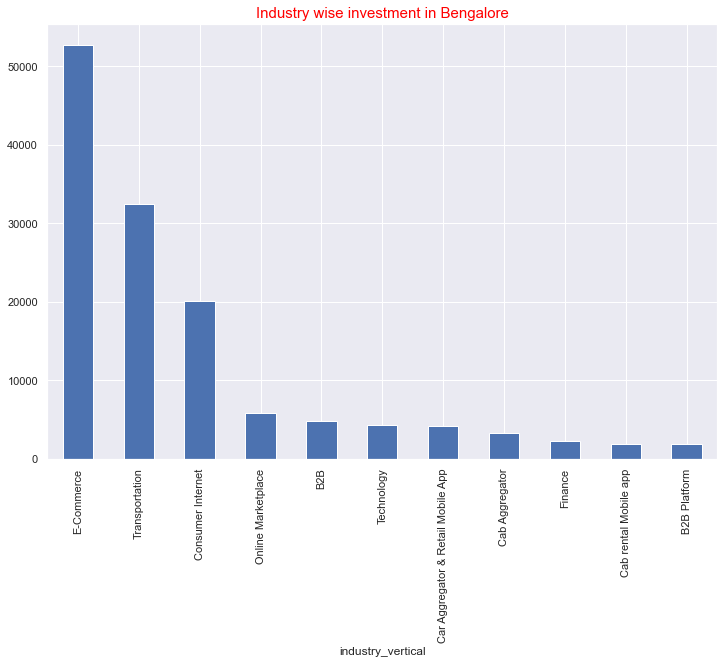

In [91]:
# Define : Which type of industry has invested in startup in Bangalore.
plt.figure(figsize=(12,8))
df_copy[df_copy["city"] == "Bangalore"].groupby("industry_vertical").sum()["amount_cr"].sort_values(ascending=False)[:11].plot(kind="bar")
plt.title("Industry wise investment in Bangalore",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary :
# In Bangalore most of the investment are done in E-Commerce sector then Consumer internet and then transportation.

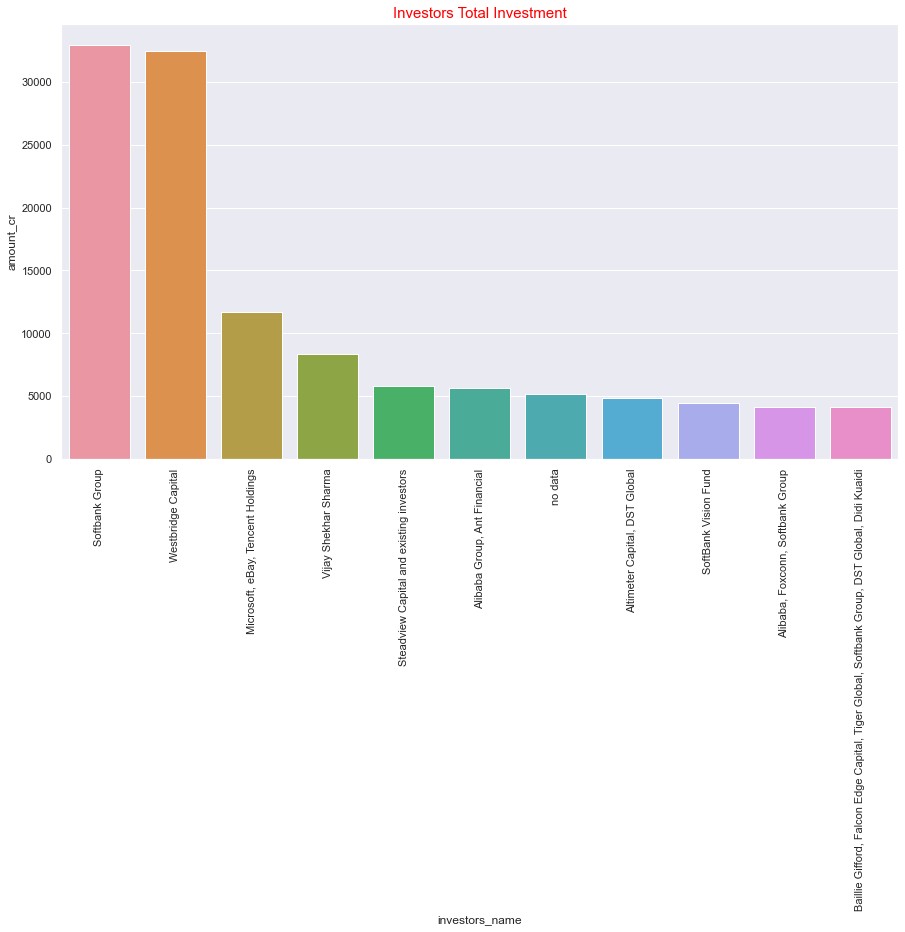

In [92]:
# Define : Which investors did howmuch investment.
# Code
bar_df = df_copy.groupby("investors_name")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="investors_name",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Investors Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Softbank Group has invested more than 34000 Cr and Westbridge Capital has invested slightly less than Softbank Group near to 33000 Cr.

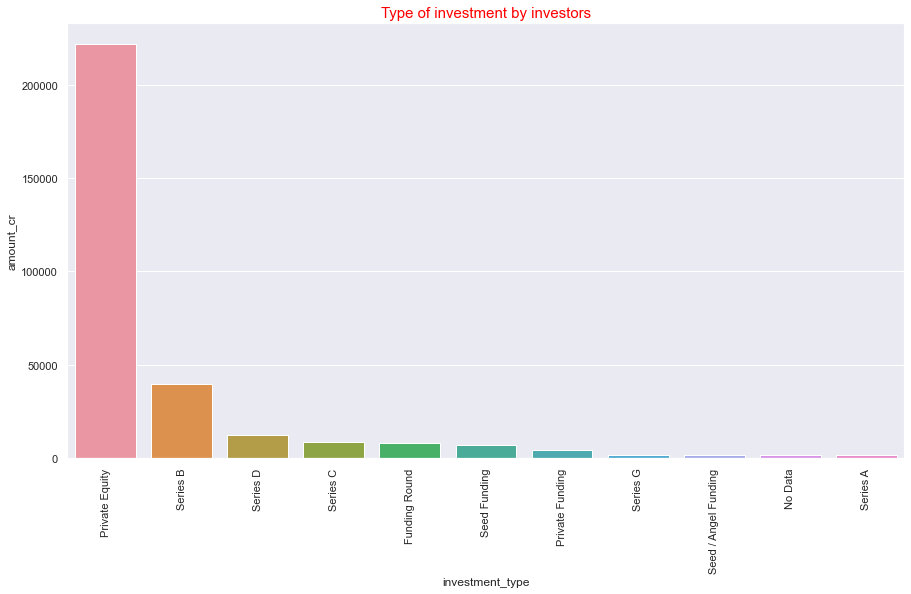

In [107]:
# Define : Total investment in which kind of investment.
# Code
bar_df = df_copy.groupby("investment_type")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="investment_type",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Type of investment by investors",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# More than 2.5 lac Cr investment are done in private equity of company.

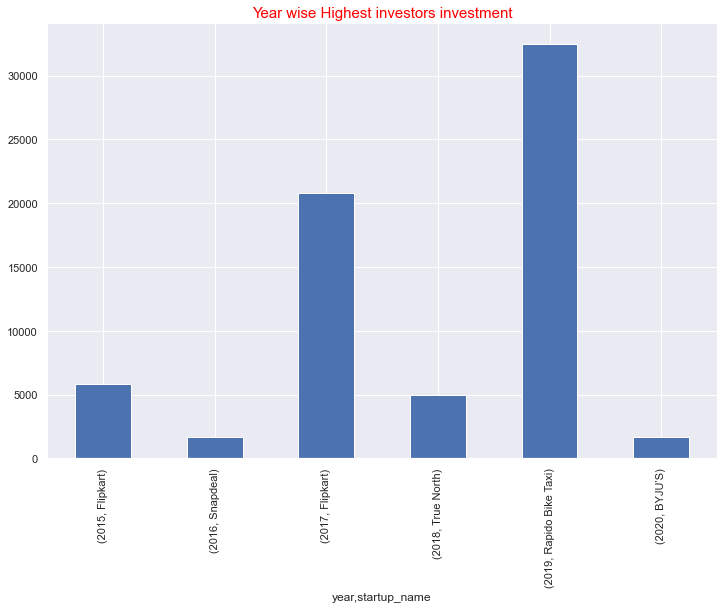

In [94]:
# Define : Year wise highest investors investment
# Code
df_copy["year"] = df_copy["date"].dt.year

years = df_copy["year"].unique()[::-1]
name_lst,investor_lst,amount_lst,year_lst = [],[],[],[]
for year in years:
    data = df_copy[df_copy["year"] == year].sort_values(by="amount_cr",ascending=False).iloc[0]
    year_lst.append(data["year"])
    name_lst.append(data["startup_name"])
    investor_lst.append(data["investors_name"])
    amount_lst.append(data["amount_cr"])

new_df = pd.DataFrame({"year":year_lst,"startup_name":name_lst,"investors_name":investor_lst,"amount_cr":amount_lst})

plt.figure(figsize=(12,8))
plt.title("Year wise Highest investors investment",fontdict={"fontsize":15,"color":"red"})
new_df.groupby(["year","startup_name"])["amount_cr"].sum().plot(kind="bar")
plt.show()

# Flipkart did two times highest investment in year 2015 and 2017.
# In 2019 Rapid Bike Taxi invested more than 32000 cr which is the highest investment amoung 2015 to 2020.
# In 2020 Byju's invested around 1600 cr.

In [97]:
df_copy["date"] = pd.to_datetime(df_copy["date"])

In [98]:
df_copy.dtypes

date                 datetime64[ns]
startup_name                 object
industry_vertical            object
sub_vertical                 object
city                         object
investors_name               object
investment_type              object
amount_cr                   float64
year                          int64
dtype: object

In [99]:
df_copy["year"] = df_copy["date"].dt.year

In [100]:
df_copy.groupby("year").sum()

,amount_cr
year,
2015,71604.884839
2016,31868.837662
2017,86824.003502
2018,42643.716672
2019,80640.749656
2020,3248.475390


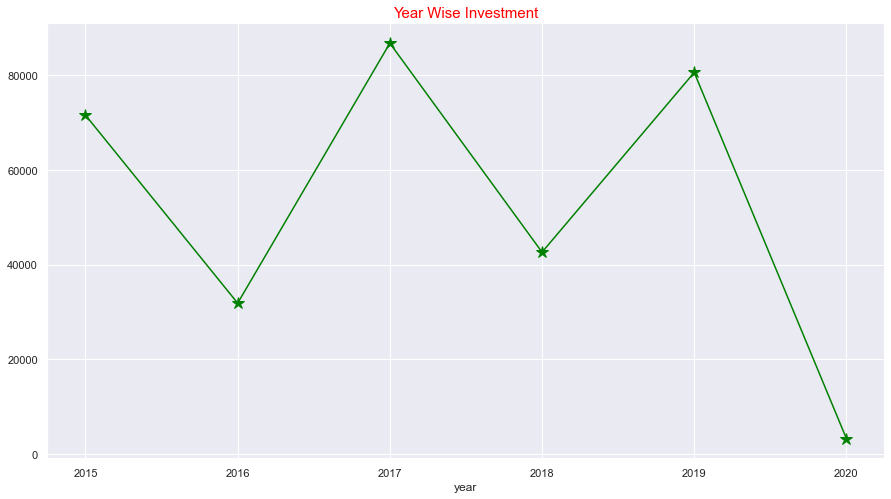

In [173]:
# Define : Year wise investment using line chart.
# Code
df_copy.groupby("year")["amount_cr"].sum().plot(c="green",marker="*",ms=12)
plt.gcf().set_size_inches(15, 8)
plt.title("Year Wise Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary :
# In 2017 investors have highest investment around 86000 cr and as time goes the number of investment getting reduced to 3248 cr in 2020.

In [102]:
df_copy["month"] = df_copy["date"].dt.month

In [103]:
df_copy[df_copy["year"] ==  2015].groupby("month").sum()["amount_cr"]

month
1      8048.951325
2      2536.549245
3      5838.239250
4      4560.393375
5      1719.403875
6      4829.540625
7     12770.980969
8      6436.482075
9     11537.251200
10     2782.872675
11     8378.862750
12     2165.357475
Name: amount_cr, dtype: float64

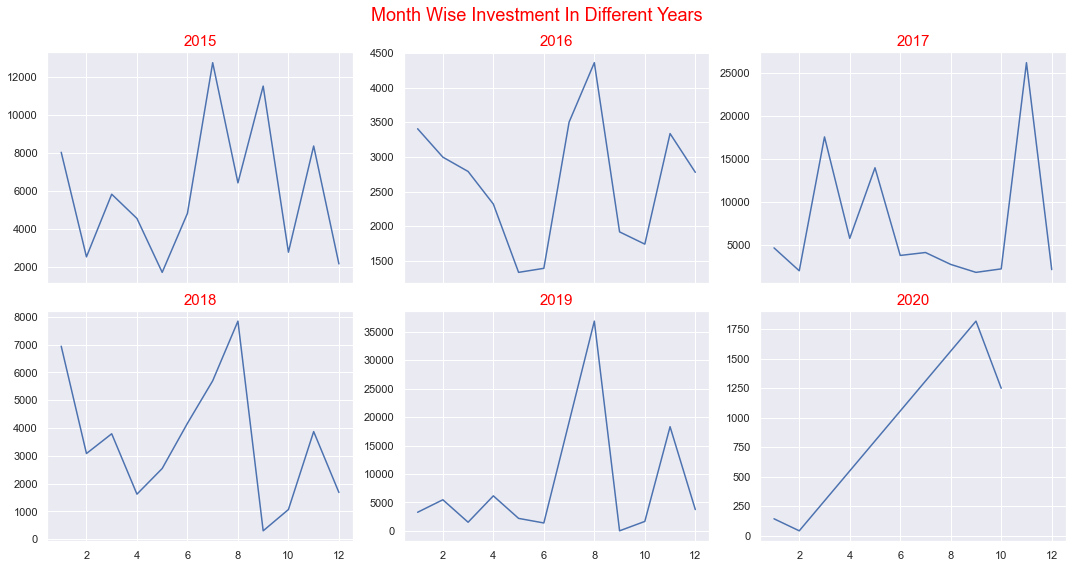

In [208]:
# Define : Monthwise investment for every year.
# Code

fig,axes = plt.subplots(2,3,sharex=True)
years = df_copy["year"].unique()[::-1]
count = 0

plt.gcf().set_size_inches(15, 8)
fig.suptitle("Month Wise Investment In Different Years",fontsize=18,c="red")


for i in range(0,2):
    for j in range(0,3):
        data = df_copy[df_copy["year"] ==  years[count]].groupby("month").sum()["amount_cr"].reset_index()
        axes[i,j].plot(data["month"],data["amount_cr"])
        axes[i,j].set_title(years[count],fontdict={"fontsize":15,"color":"red"})
        plt.tight_layout()
        count += 1
plt.show()

        
# Summary :
# Investors are investing more money in between june to august as per 2015, 2016, 2018, 2019 graph shows.
# In 2017 investor invested almost 30000 Cr between octomber to december.
# In 2020 year investment growth exponentially increased from 25 Cr to almost 1800 Cr in september month and suddenly goes down to 1250 Cr in octomber month.

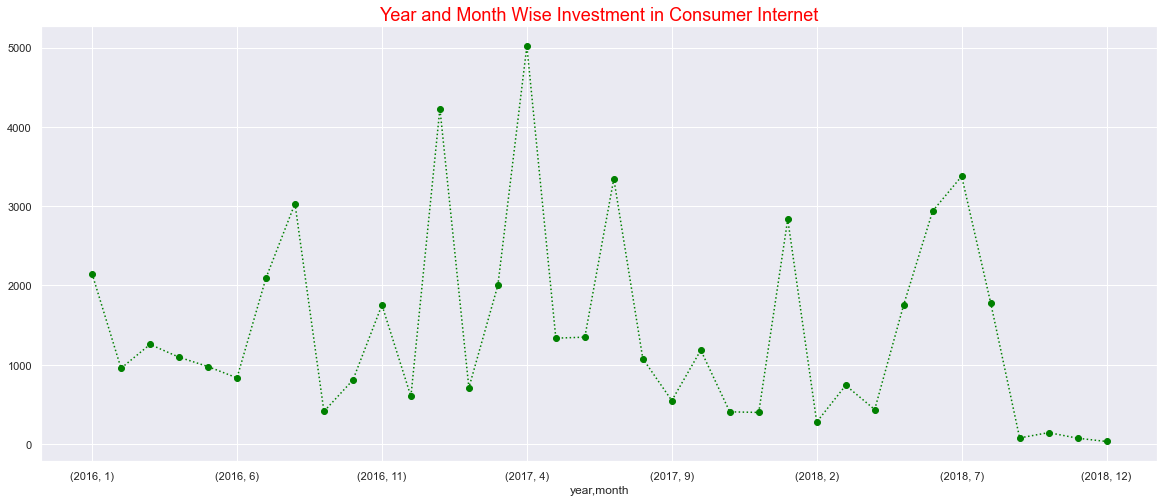

In [216]:
# Define : month and year wise investment in consumer internet.
# Code
temp_df = df_copy[df_copy["industry_vertical"] == "Consumer Internet"]

plt.figure(figsize=(20,8))
temp_df.groupby(["year","month"])["amount_cr"].sum().plot(c="green",marker="o",linestyle="dotted")
plt.title("Year and Month Wise Investment in Consumer Internet",fontdict={"fontsize":18,"color":"red"})

# temp_df.groupby(["year","month"])["amount_cr"].sum().plot(c="red",marker="o")
plt.show()

# Summary :
# In december 2016 investors are more invested in consumer internet more than 4000 cr.
# Then investment goes down to 800 cr in January 2017 and flactuated till 2017
# and gradually goes up from april 2018 to july 2018 and drastically goes down till december 2018.

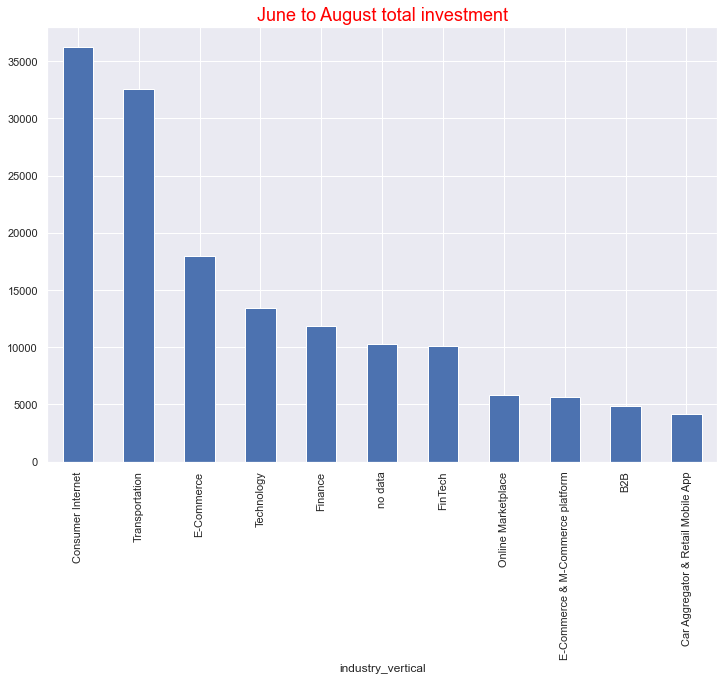

In [219]:
# Find companies that started in between june to august with industry_vertical and sub_vertical.
month_df = df_copy[(df_copy["month"] == 6) | (df_copy["month"] == 7) | (df_copy["month"] == 8) | (df_copy["year"] == 2015) |(df_copy["year"] == 2016) | (df_copy["year"] == 2018)| (df_copy["year"] == 2019)]
plt.figure(figsize=(12,8))
plt.title("June to August total investment",fontdict={"fontsize":18,"color":"red"})
month_df.groupby("industry_vertical")["amount_cr"].sum().sort_values(ascending=False)[:11].plot(kind="bar")
plt.show()

# In 2015, 2016, 2018, 2019 year june to august investors invested in consumer internet and transportation.

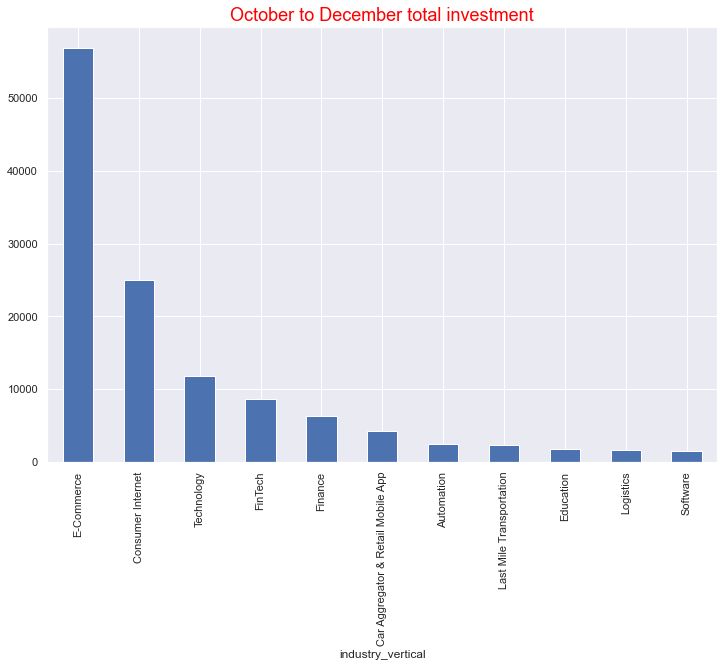

In [224]:
# Find companies that started in between june to august and octomber to december with industry_vertical and sub_vertical.
month_df = df_copy[(df_copy["month"] == 10) | (df_copy["month"] == 11) | (df_copy["month"] == 12) | (df_copy["year"] == 2017) ]
plt.figure(figsize=(12,8))
plt.title("October to December total investment",fontdict={"fontsize":18,"color":"red"})
month_df.groupby("industry_vertical")["amount_cr"].sum().sort_values(ascending=False)[:11].plot(kind="bar")
plt.show()

# In 2017 year october to december investors invested in E-Commerce.

### Conclusion :

In [225]:
# Investors have more invested on Consumer Internet,E-Commerce and technology sector.
# Softbank Group has invested more money on Consumer Internet and E-Commerce sector.
# Sub vertical Bike Taxi has more investment.
# Most of the startup started in Bagalore and Mumbai.
# In Bangalore city investors invested in E-Commerce, Consumer Internet, Transporation.
# Softbank Group and Westbridge Capital is the top two investors.
# Investors have invested as private equity in startup and the total amount is 2.4lac cr.
# Flipkart was highest investor in year 2015 and 2017.
# In year 2019 Rapid Bike Taxi invested more than 32000 cr which is the highest investment amoung 2015 to 2020 that's why sub vertical bike taxi has the highest investment.
# In year 2020 Byju's was the highest investor.
# In 2017 we have highest investment around 86000 cr and as time goes the number of investment getting reduced to 3248 cr in 2020.
# Investors has invested more money in between june to august as per 2015, 2016, 2018, 2019.
# In 2017 investor invested almost 30000 Cr between octomber to december.
# In 2020 year investment growth exponentially increased from 25 Cr to almost 1800 Cr in september month and suddenly goes down to 1250 Cr in octomber month.
# In december 2016 investors are more invested in consumer internet more than 4000 cr.
# Then investment goes down to 800 cr in January 2017 and flactuated till 2017 and gradually goes up from april 2018 to july 2018 and drastically goes down till december 2018.
# In 2015, 2016, 2018, 2019 year june to august investors invested in consumer internet and transportation.
# In 2017 year october to december investors invested in E-Commerce.